In [4]:
import pandas as pd
import numpy as np
from lstm import *
from cross_validiation_split import BlockTSSplit
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [2]:
cwd = os.getcwd()
btc = pd.read_pickle(cwd + '/btc.pkl')
btc.head()

,open,close,high,low,volume,log_rtrn_1m,ewm_21,ewm_35,ewm_80,ewm_250
2018-01-01 00:06:00,13628.0,13625.0,13637.000000,13621.0,21.351554,-0.000220,13718.096783,13726.947207,13735.132581,13739.752243
2018-01-01 00:07:00,13624.0,13607.0,13624.000000,13591.0,23.800193,-0.001322,13707.997075,13720.283473,13731.968814,13738.694456
2018-01-01 00:08:00,13602.0,13639.0,13647.000000,13602.0,26.622142,0.002349,13701.724614,13715.767725,13729.673287,13737.900078
2018-01-01 00:09:00,13639.0,13640.0,13676.716245,13607.0,45.154382,0.000073,13696.113286,13711.558407,13727.459132,13737.119997
2018-01-01 00:10:00,13639.0,13640.0,13641.000000,13600.0,36.542425,0.000000,13691.012078,13707.582940,13725.299647,13736.346133


In [7]:
LAST_YEAR = btc.index[-1] - pd.Timedelta('1Y')
# LAST_12WEEKS = btc.index[-1] - pd.Timedelta('12W')
X = btc.loc[LAST_YEAR:]

blocked_cv_folds = BlockTSSplit(n_splits=5)

expanding_cv_folds = TimeSeriesSplit(n_splits=5)

model_params = {'seq_length': 5, 'epochs': 50, 'batch_size': 32}

In [18]:
scores, cv_history, model = cv_score(expanding_cv_folds, X, model_params)

2022-06-28 10:33:47.786696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 10:33:47.786729: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 10:33:47.786752: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mikiu-xps13): /proc/driver/nvidia/version does not exist
2022-06-28 10:33:47.788334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Fitting fold number 1
Epoch 1/50
685/685 [==============================] - 20s 23ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.1360 - val_mse: 0.1360
Epoch 2/50
685/685 [==============================] - 16s 23ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.1082 - val_mse: 0.1082
Epoch 3/50
685/685 [==============================] - 16s 23ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0915 - val_mse: 0.0915
Epoch 4/50
685/685 [==============================] - 17s 24ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.1298 - val_mse: 0.1298
Epoch 5/50
685/685 [==============================] - 24s 35ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.1021 - val_mse: 0.1021
Epoch 6/50
685/685 [==============================] - 20s 29ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.1243 - val_mse: 0.1243
Epoch 7/50
685/685 [==============================] - 20s 29ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0941 - val_mse: 0.0941
Epoch 8/50
685/685 [====================

INFO:tensorflow:Assets written to: home/mikiu/Documents/git_projects/crypto/saved_models/model_1/assets


INFO:tensorflow:Assets written to: home/mikiu/Documents/git_projects/crypto/saved_models/model_1/assets


Fitting fold number 2
Epoch 1/50
1370/1370 [==============================] - 40s 26ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2/50
1370/1370 [==============================] - 34s 25ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 3/50
1370/1370 [==============================] - 40s 29ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 4/50
1370/1370 [==============================] - 37s 27ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 5/50
1370/1370 [==============================] - 36s 26ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 6/50
1370/1370 [==============================] - 38s 28ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 7/50
1370/1370 [==============================] - 34s 24ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 8/50
1370/1370 [====

INFO:tensorflow:Assets written to: home/mikiu/Documents/git_projects/crypto/saved_models/model_2/assets


INFO:tensorflow:Assets written to: home/mikiu/Documents/git_projects/crypto/saved_models/model_2/assets


Fitting fold number 3
Epoch 1/50
2055/2055 [==============================] - 51s 23ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 2/50
2055/2055 [==============================] - 38s 19ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 3/50
2055/2055 [==============================] - 45s 22ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 4/50
2055/2055 [==============================] - 38s 19ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 5/50
2055/2055 [==============================] - 40s 19ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 6/50
685/685 [==============================] - 8s 12ms/step - loss: 0.0080 - mse: 0.0080


INFO:tensorflow:Assets written to: home/mikiu/Documents/git_projects/crypto/saved_models/model_3/assets


INFO:tensorflow:Assets written to: home/mikiu/Documents/git_projects/crypto/saved_models/model_3/assets


Fitting fold number 4
Epoch 1/50
2740/2740 [==============================] - 58s 19ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 2/50
2740/2740 [==============================] - 55s 20ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 3/50
2740/2740 [==============================] - 44s 16ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 4/50
2740/2740 [==============================] - 48s 18ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 5/50
2740/2740 [==============================] - 52s 19ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 6/50
685/685 [==============================] - 11s 15ms/step - loss: 0.0131 - mse: 0.0131


INFO:tensorflow:Assets written to: home/mikiu/Documents/git_projects/crypto/saved_models/model_4/assets


INFO:tensorflow:Assets written to: home/mikiu/Documents/git_projects/crypto/saved_models/model_4/assets


Fitting fold number 5
Epoch 1/50


2022-06-28 10:58:40.721689: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 35062960 exceeds 10% of free system memory.
2022-06-28 10:58:40.831394: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 35062960 exceeds 10% of free system memory.


3425/3425 [==============================] - 62s 17ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 2/50
3425/3425 [==============================] - 59s 17ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 3/50
3425/3425 [==============================] - 57s 17ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 4/50
3425/3425 [==============================] - 67s 20ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 5/50
3425/3425 [==============================] - 68s 20ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 6/50
3425/3425 [==============================] - 64s 19ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 7/50
3425/3425 [==============================] - 58s 17ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 8/50
3425/3425 [==============================] - 55s

INFO:tensorflow:Assets written to: home/mikiu/Documents/git_projects/crypto/saved_models/model_5/assets


INFO:tensorflow:Assets written to: home/mikiu/Documents/git_projects/crypto/saved_models/model_5/assets


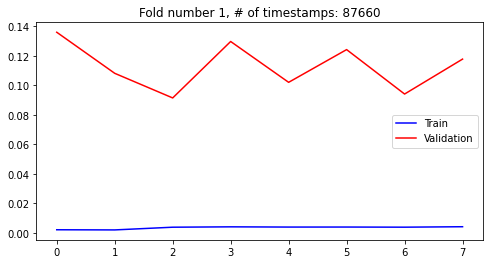

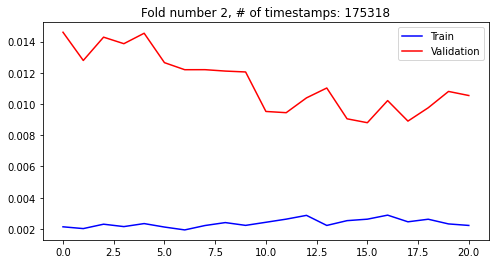

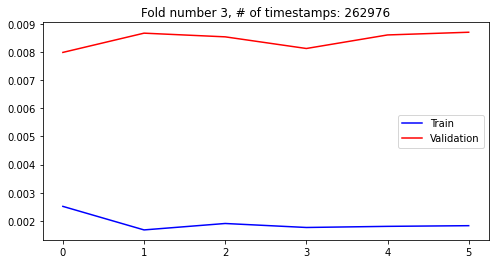

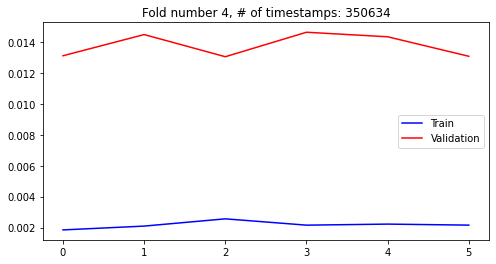

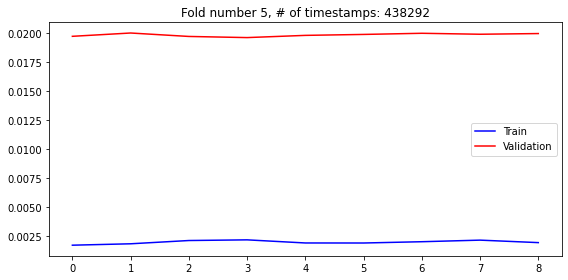

In [38]:
# Plotting the epoch MSE for both training and validation sets
train_set_length = list()
for train,_ in expanding_cv_folds.split(X):
    train_set_length.append(len(train))

for i, fold in enumerate(cv_history):
    hist = fold.history
    _, ax = plt.subplots(figsize=(8,4))
    ax.plot(hist['mse'], color='blue', label='Train')
    ax.plot(hist['val_mse'], color='red', label='Validation')
    ax.set_title(f'Fold number {i+1}, # of timestamps: {train_set_length[i]}')
    ax.legend()
plt.tight_layout()
plt.show()

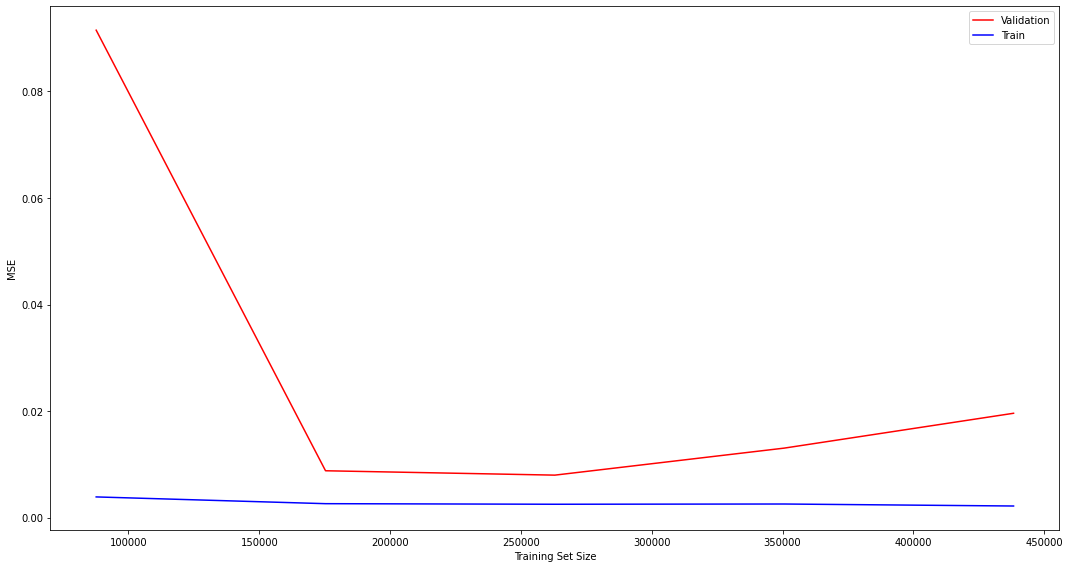

In [43]:
train_mse = list()
val_mse = list()
for i, fold in enumerate(cv_history):
    hist = fold.history
    val_mse.append(min(hist['val_mse']))
    train_mse.append(hist['mse'][hist['val_mse'].index(min(hist['val_mse']))])
    
fig, ax = plt.subplots(figsize=(1,8))
ax.plot(train_set_length, val_mse, color='red', label='Validation')
ax.plot(train_set_length, train_mse, color='blue', label='Train')
ax.legend()
ax.set_xlabel('Training Set Size')
ax.set_ylabel('MSE')
plt.tight_layout()
plt.show()